# Medical Condition Prediction Dataset:

## About Dataset:

This dataset provides information about various medical conditions such as Cancer, Pneumonia, and Diabetic based on demographic, lifestyle, and health-related features. It contains randomly generated user data, including multiple missing values, making it suitable for handling imbalanced classification tasks and missing data problems.

Features:

1. **id**: Unique identifier for each user.
2. **full_name**: Randomly generated user name.
3. **age**: Age of the user (ranging from 18 to 90 years), with some missing values.
4. **gender**: The gender of the user (categorized as Male, Female, or Non-Binary).
5. **smoking_status**: Indicates the smoking status of the user (Smoker, Non-Smoker, Former-Smoker).
6. **bmi**: Body Mass Index (BMI) of the user (ranging from 15 to 40), with some missing values.
7. **blood_pressure**: Blood pressure levels of the user (ranging from 90 to 180 mmHg), with some missing values.
8. **glucose_levels**: Blood glucose levels of the user (ranging from 70 to 200 mg/dL), with some missing values.
9. **condition**: The target label indicating the medical condition of the user (Cancer, Pneumonia, or Diabetic), with imbalanced distribution (15% Cancer, 25% Pneumonia, 60% Diabetic).

Goal:

The objective of this dataset is to predict the medical condition (Cancer, Pneumonia, Diabetic) of a user based on their demographic, lifestyle, and health-related features. This dataset can be used to explore strategies for dealing with imbalanced classes and missing data in healthcare applications. ​

## Import Libraries:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()


Saving medical_conditions_dataset.csv to medical_conditions_dataset.csv


In [5]:
import pandas as pd

data = pd.read_csv("medical_conditions_dataset.csv")
print(data.head())


   id full_name   age gender smoking_status        bmi  blood_pressure  \
0   1  User0001   NaN   male     Non-Smoker        NaN             NaN   
1   2  User0002  30.0   male     Non-Smoker        NaN      105.315064   
2   3  User0003  18.0   male     Non-Smoker  35.612486             NaN   
3   4  User0004   NaN   male     Non-Smoker        NaN       99.119829   
4   5  User0005  76.0   male     Non-Smoker        NaN             NaN   

   glucose_levels  condition  
0             NaN  Pneumonia  
1             NaN   Diabetic  
2             NaN  Pneumonia  
3             NaN  Pneumonia  
4             NaN   Diabetic  


## EDA:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   full_name       10000 non-null  object 
 2   age             5445 non-null   float64
 3   gender          10000 non-null  object 
 4   smoking_status  10000 non-null  object 
 5   bmi             4652 non-null   float64
 6   blood_pressure  3766 non-null   float64
 7   glucose_levels  4756 non-null   float64
 8   condition       10000 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 703.3+ KB


In [7]:
data.describe()

id          age          bmi  blood_pressure  glucose_levels
count  10000.00000  5445.000000  4652.000000     3766.000000     4756.000000
mean    5000.50000    53.541598    27.423420      135.209429      135.219608
std     2886.89568    20.925113     7.231257       26.041531       37.607638
min        1.00000    18.000000    15.012119       90.009620       70.015961
25%     2500.75000    35.000000    21.077894      113.107754      102.273703
50%     5000.50000    54.000000    27.326204      134.821040      135.436764
75%     7500.25000    72.000000    33.689330      157.949509      168.349011
max    10000.00000    89.000000    39.998687      179.999359      199.890429

In [8]:
data.isna().sum()

id                   0
full_name            0
age               4555
gender               0
smoking_status       0
bmi               5348
blood_pressure    6234
glucose_levels    5244
condition            0
dtype: int64

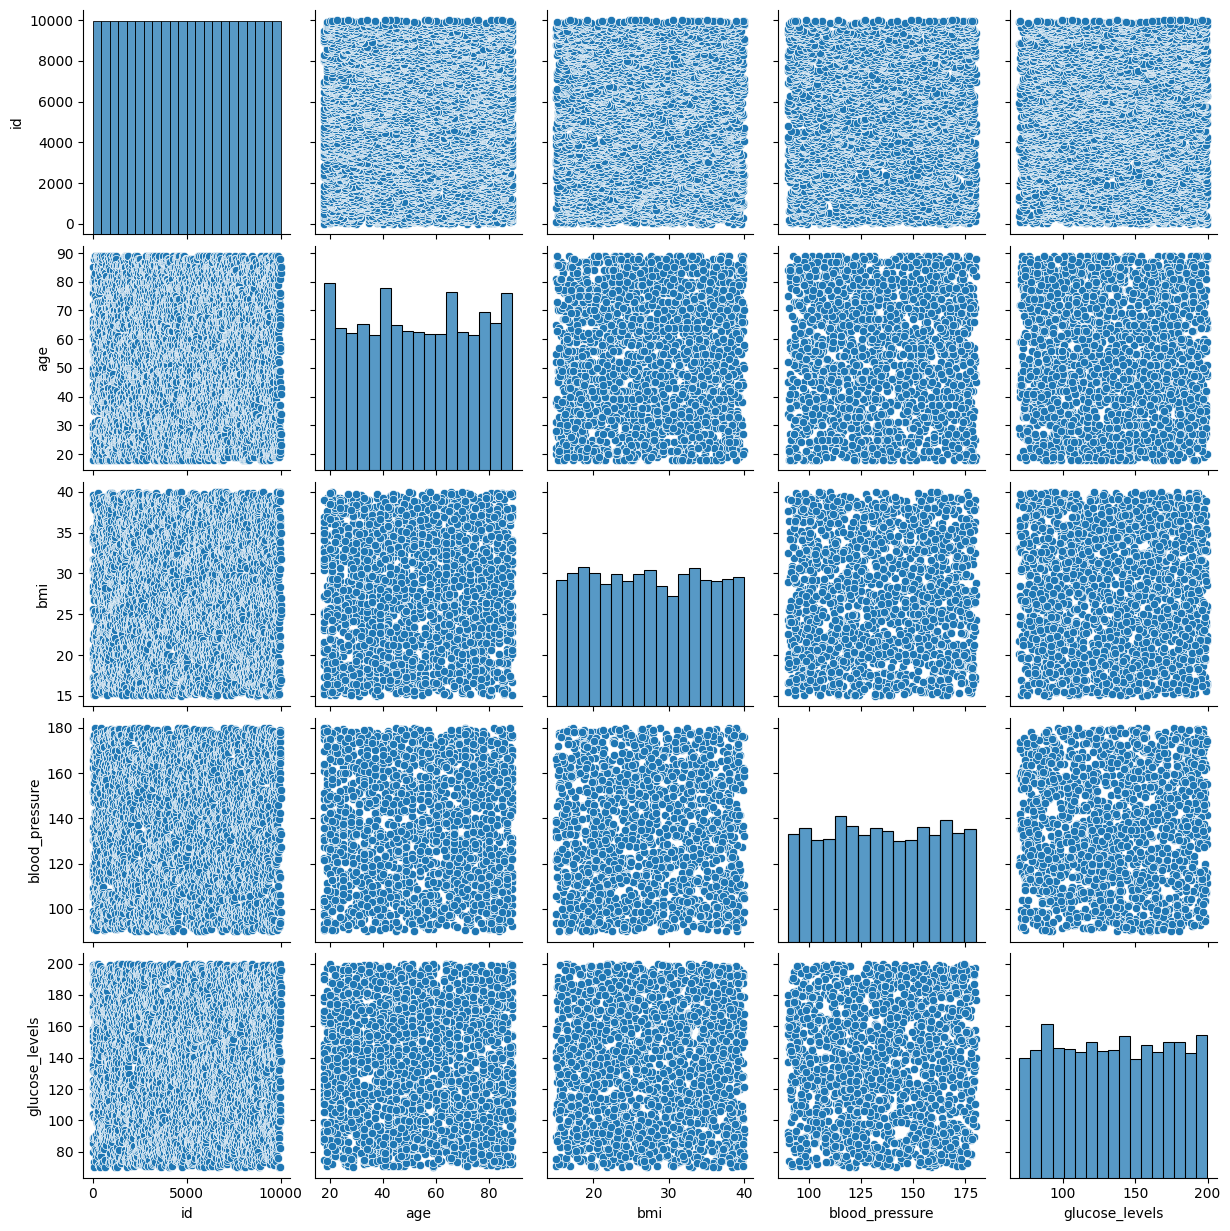

In [9]:
sns.pairplot(data)
plt.show()

We see that none of our feature distribution is skewed, based on that we gonna impute using the mean

In [10]:
df = data.copy()
df['gender_smoking'] = df['gender'] + ' - ' + df['smoking_status']
df.head()

id full_name   age gender smoking_status        bmi  blood_pressure  \
0   1  User0001   NaN   male     Non-Smoker        NaN             NaN   
1   2  User0002  30.0   male     Non-Smoker        NaN      105.315064   
2   3  User0003  18.0   male     Non-Smoker  35.612486             NaN   
3   4  User0004   NaN   male     Non-Smoker        NaN       99.119829   
4   5  User0005  76.0   male     Non-Smoker        NaN             NaN   

   glucose_levels  condition     gender_smoking  
0             NaN  Pneumonia  male - Non-Smoker  
1             NaN   Diabetic  male - Non-Smoker  
2             NaN  Pneumonia  male - Non-Smoker  
3             NaN  Pneumonia  male - Non-Smoker  
4             NaN   Diabetic  male - Non-Smoker

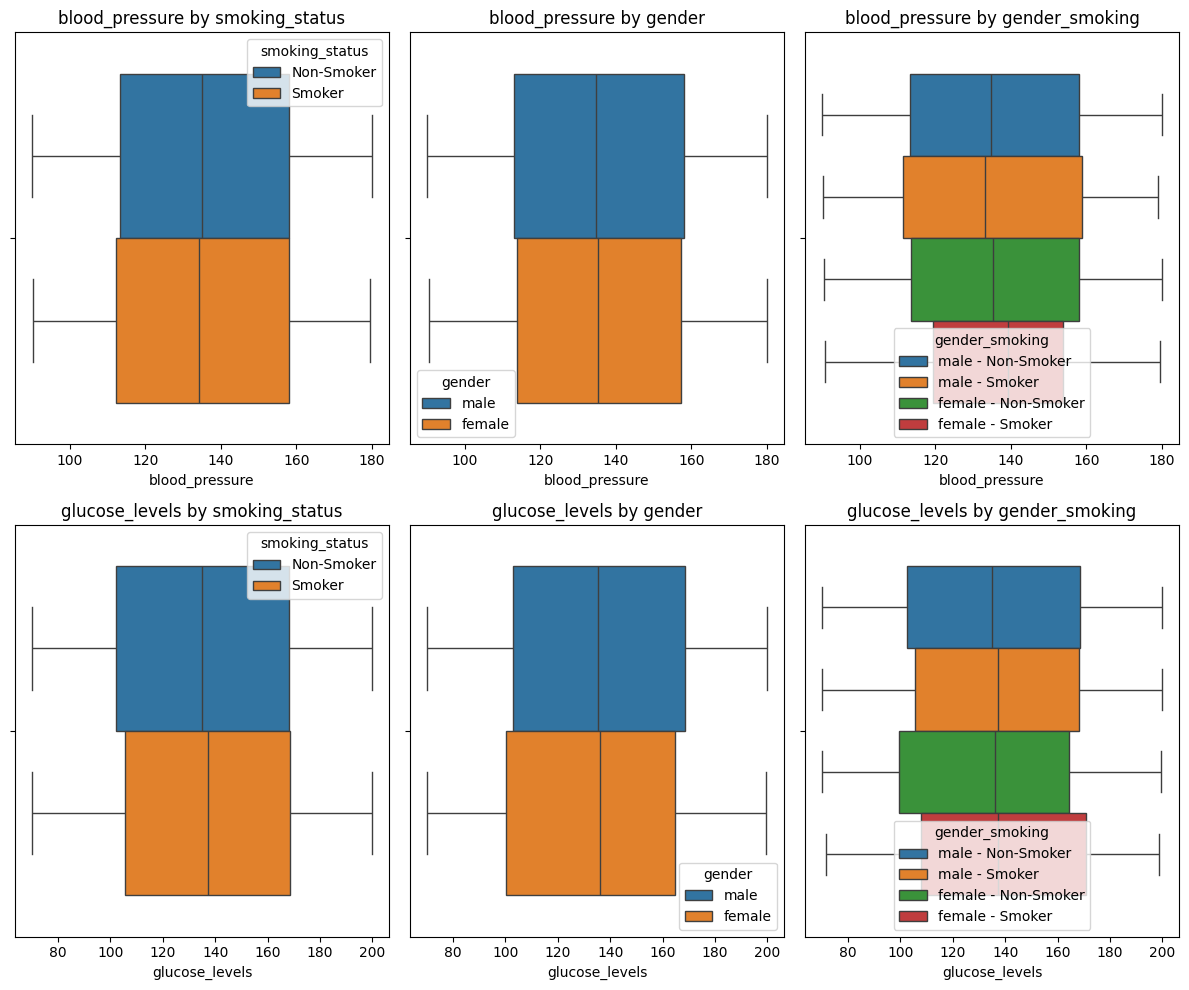

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(12, 10))

#PLOTS FOR blood_pressure:
sns.boxplot(data=data, x='blood_pressure', hue='smoking_status', ax=axes[0, 0])
axes[0, 0].set_title('blood_pressure by smoking_status')

sns.boxplot(data=df, x='blood_pressure', hue='gender', ax=axes[0, 1])
axes[0, 1].set_title('blood_pressure by gender')

sns.boxplot(data=df, x='blood_pressure', hue='gender_smoking', ax=axes[0, 2])
axes[0, 2].set_title('blood_pressure by gender_smoking')

#PLOTS FOR blood_pressure:
sns.boxplot(data=df, x='glucose_levels', hue='smoking_status', ax=axes[1, 0])
axes[1, 0].set_title('glucose_levels by smoking_status')

sns.boxplot(data=df, x='glucose_levels', hue='gender', ax=axes[1, 1])
axes[1, 1].set_title('glucose_levels by gender')

sns.boxplot(data=df, x='glucose_levels', hue='gender_smoking', ax=axes[1, 2])
axes[1, 2].set_title('glucose_levels by gender_smoking')

plt.tight_layout()
plt.show()

### Imputation:

In [12]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')

df[['age', 'bmi']] = mean_imputer.fit_transform(df[['age', 'bmi']])
print(df[["age", "bmi"]].isna().sum())

df['blood_pressure'] = df.groupby("gender_smoking")['blood_pressure'].transform(lambda x: x.fillna(x.mean()))
print(df[['blood_pressure']].isna().sum())

df['glucose_levels'] = df.groupby("gender_smoking")['glucose_levels'].transform(lambda x: x.fillna(x.mean()))
print(df[['glucose_levels']].isna().sum())

age    0
bmi    0
dtype: int64
blood_pressure    0
dtype: int64
glucose_levels    0
dtype: int64


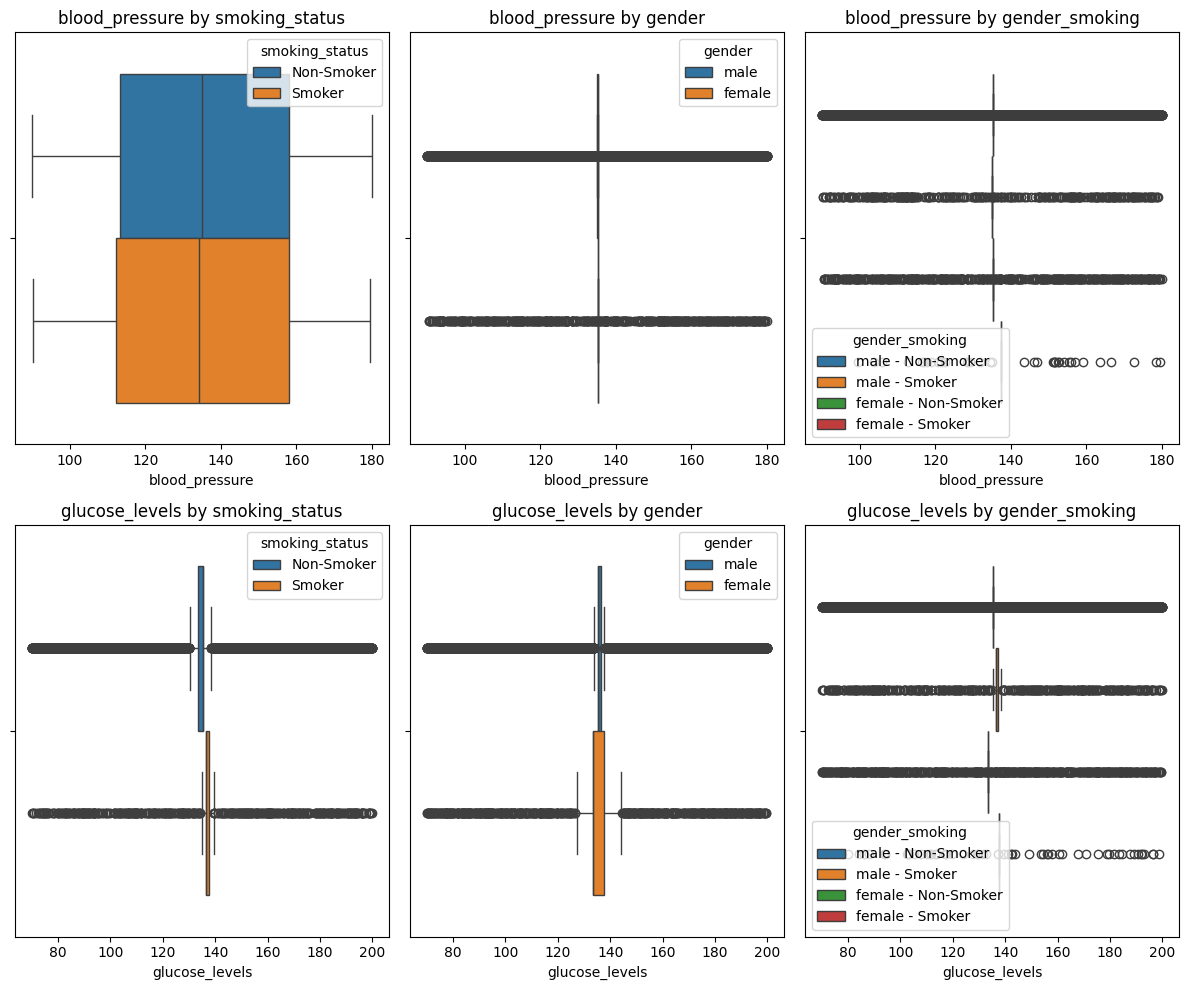

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(12, 10))

#PLOTS FOR blood_pressure:
sns.boxplot(data=data, x='blood_pressure', hue='smoking_status', ax=axes[0, 0])
axes[0, 0].set_title('blood_pressure by smoking_status')

sns.boxplot(data=df, x='blood_pressure', hue='gender', ax=axes[0, 1])
axes[0, 1].set_title('blood_pressure by gender')

sns.boxplot(data=df, x='blood_pressure', hue='gender_smoking', ax=axes[0, 2])
axes[0, 2].set_title('blood_pressure by gender_smoking')

#PLOTS FOR blood_pressure:
sns.boxplot(data=df, x='glucose_levels', hue='smoking_status', ax=axes[1, 0])
axes[1, 0].set_title('glucose_levels by smoking_status')

sns.boxplot(data=df, x='glucose_levels', hue='gender', ax=axes[1, 1])
axes[1, 1].set_title('glucose_levels by gender')

sns.boxplot(data=df, x='glucose_levels', hue='gender_smoking', ax=axes[1, 2])
axes[1, 2].set_title('glucose_levels by gender_smoking')

plt.tight_layout()
plt.show()

In [14]:
df.head()

id full_name        age gender smoking_status        bmi  blood_pressure  \
0   1  User0001  53.541598   male     Non-Smoker  27.423420      135.170455   
1   2  User0002  30.000000   male     Non-Smoker  27.423420      105.315064   
2   3  User0003  18.000000   male     Non-Smoker  35.612486      135.170455   
3   4  User0004  53.541598   male     Non-Smoker  27.423420       99.119829   
4   5  User0005  76.000000   male     Non-Smoker  27.423420      135.170455   

   glucose_levels  condition     gender_smoking  
0      135.382369  Pneumonia  male - Non-Smoker  
1      135.382369   Diabetic  male - Non-Smoker  
2      135.382369  Pneumonia  male - Non-Smoker  
3      135.382369  Pneumonia  male - Non-Smoker  
4      135.382369   Diabetic  male - Non-Smoker

In [15]:
df.isna().sum()

id                0
full_name         0
age               0
gender            0
smoking_status    0
bmi               0
blood_pressure    0
glucose_levels    0
condition         0
gender_smoking    0
dtype: int64

Now, there is no null value

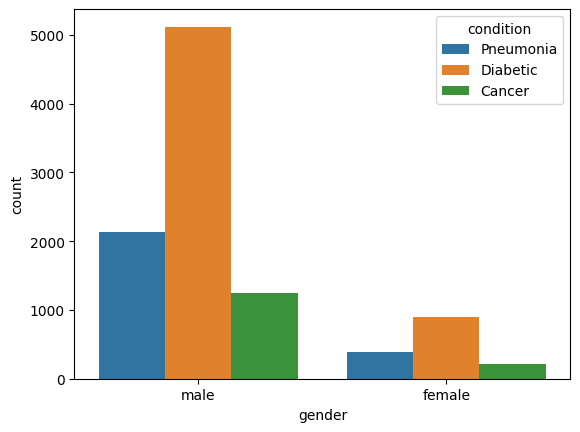

In [16]:
sns.countplot(data=df, x='gender', hue='condition')
plt.show()

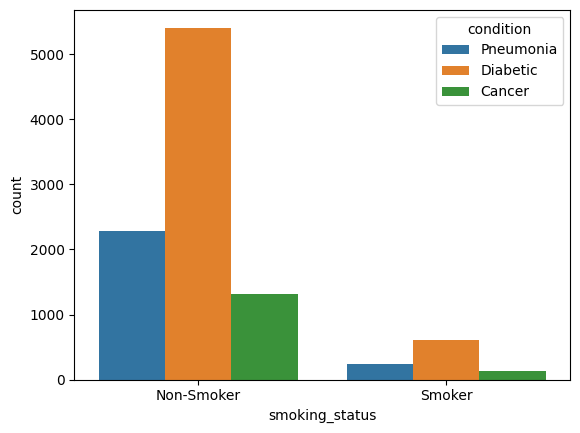

In [17]:
sns.countplot(data=df, x='smoking_status', hue='condition')
plt.show()

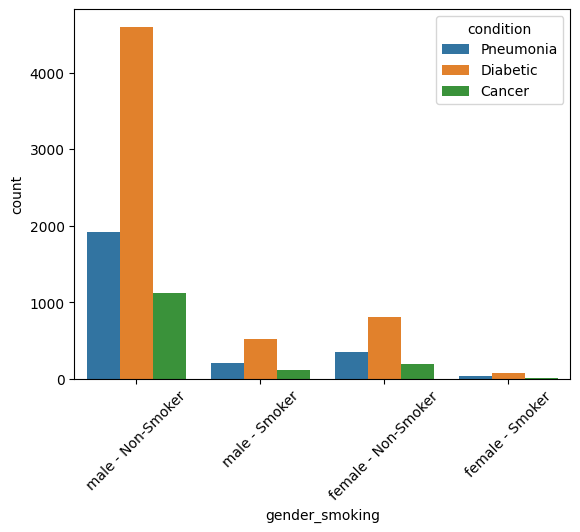

In [18]:
sns.countplot(data=df, x='gender_smoking', hue='condition')
plt.xticks(rotation=45)
plt.show()

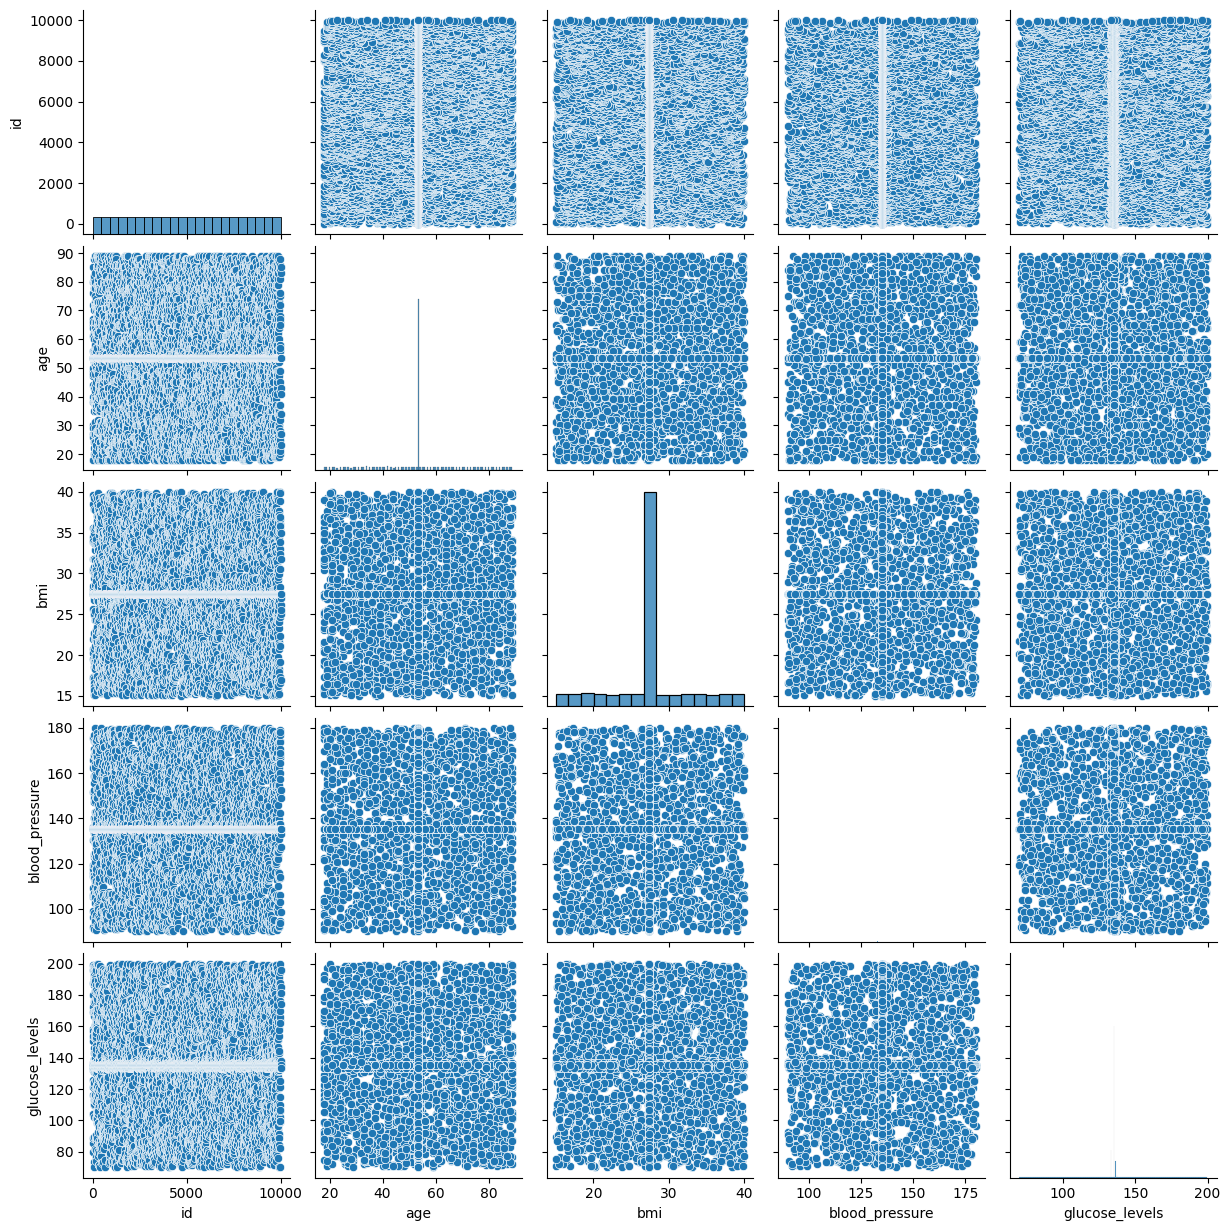

In [19]:
sns.pairplot(df)
plt.show()

## Feature Engineering:

In [20]:
df.drop(columns=["id", "full_name", "gender_smoking"], inplace=True)
df.head()

age gender smoking_status        bmi  blood_pressure  glucose_levels  \
0  53.541598   male     Non-Smoker  27.423420      135.170455      135.382369   
1  30.000000   male     Non-Smoker  27.423420      105.315064      135.382369   
2  18.000000   male     Non-Smoker  35.612486      135.170455      135.382369   
3  53.541598   male     Non-Smoker  27.423420       99.119829      135.382369   
4  76.000000   male     Non-Smoker  27.423420      135.170455      135.382369   

   condition  
0  Pneumonia  
1   Diabetic  
2  Pneumonia  
3  Pneumonia  
4   Diabetic

### Feature Encoding:

In [21]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

age  gender  smoking_status        bmi  blood_pressure  \
0  53.541598       1               0  27.423420      135.170455   
1  30.000000       1               0  27.423420      105.315064   
2  18.000000       1               0  35.612486      135.170455   
3  53.541598       1               0  27.423420       99.119829   
4  76.000000       1               0  27.423420      135.170455   

   glucose_levels  condition  
0      135.382369          2  
1      135.382369          1  
2      135.382369          2  
3      135.382369          2  
4      135.382369          1

In [22]:
data["condition"].value_counts()

condition
Diabetic     6013
Pneumonia    2527
Cancer       1460
Name: count, dtype: int64

We see that there is imbalance between the classes

## Handling Imbalanced DATA:

### Splitting DATA:

In [23]:
X = df.drop(columns=["condition"])
y = df["condition"]

### Oversampling using SMOTE:

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Random Forest Classifier:

### Without using resampled Data

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.09      0.11       429
           1       0.60      0.61      0.61      1813
           2       0.26      0.29      0.28       758

    accuracy                           0.46      3000
   macro avg       0.33      0.33      0.33      3000
weighted avg       0.45      0.46      0.45      3000



### Using resampled Data

In [26]:
from sklearn.model_selection import cross_val_predict

model = RandomForestClassifier(random_state=42)
y_pred_cv  = cross_val_predict(model, X_train_resampled, y_train_resampled, cv=5)
print(classification_report(y_train_resampled, y_pred_cv))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      4200
           1       0.56      0.54      0.55      4200
           2       0.63      0.60      0.61      4200

    accuracy                           0.62     12600
   macro avg       0.62      0.62      0.62     12600
weighted avg       0.62      0.62      0.62     12600



we can see there is an improvement in detecting classes 0 and 1 after resampling data

## Logistic Regression:

When using Logistic Regression it's better to standardize our data

### Without using resampled Data

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_num = X_train.drop(["gender", "smoking_status"], axis=1)
std = StandardScaler()

X_scaled = std.fit_transform(X_num)

X_scaled = pd.DataFrame(X_scaled, columns=X_num.columns)

X_trsf = pd.concat([X_scaled.reset_index(drop=True), X_train[["gender", "smoking_status"]].reset_index(drop=True)], axis=1)

print(f"X_scaled shape: {X_trsf.shape}, y_train shape: {y_train.shape}")

model = LogisticRegression(multi_class='multinomial', solver= "newton-cg", random_state=42)
y_pred_cv = cross_val_predict(model, X_scaled, y_train, cv=5)
print(classification_report(y_train, y_pred_cv))

X_scaled shape: (7000, 6), y_train shape: (7000,)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1031
           1       0.60      1.00      0.75      4200
           2       0.00      0.00      0.00      1769

    accuracy                           0.60      7000
   macro avg       0.20      0.33      0.25      7000
weighted avg       0.36      0.60      0.45      7000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

### Using resampled Data

In [28]:
from sklearn.preprocessing import StandardScaler

X_num = X_train_resampled.drop(["gender", "smoking_status"], axis=1)
std = StandardScaler()

X_scaled = std.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, columns=X_num.columns)
X_scaled = pd.concat([X_scaled.reset_index(drop=True), X_train_resampled[["gender", "smoking_status"]].reset_index(drop=True)], axis=1)

model = LogisticRegression(multi_class='multinomial', solver= "newton-cg", random_state=42)
y_pred_cv = cross_val_predict(model, X_scaled, y_train_resampled, cv=5)
print(classification_report(y_train_resampled, y_pred_cv))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.37      0.46      0.41      4200
           1       0.37      0.52      0.43      4200
           2       0.35      0.13      0.19      4200

    accuracy                           0.37     12600
   macro avg       0.36      0.37      0.34     12600
weighted avg       0.36      0.37      0.34     12600



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## SVM:

When using SVM it's better to standardize our data

### Without using resampled Data

In [29]:
from sklearn.svm import SVC

X_num = X_train.drop(["gender", "smoking_status"], axis=1)
std = StandardScaler()

X_scaled = std.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, columns=X_num.columns)
X_scaled = pd.concat([X_scaled.reset_index(drop=True), X_train[["gender", "smoking_status"]].reset_index(drop=True)], axis=1)

clf = SVC(C=1, gamma= 100, random_state=42)
y_pred_cv = cross_val_predict(clf, X_scaled, y_train, cv=5)
print(classification_report(y_train, y_pred_cv))

              precision    recall  f1-score   support

           0       0.11      0.01      0.01      1031
           1       0.60      0.96      0.74      4200
           2       0.22      0.03      0.05      1769

    accuracy                           0.58      7000
   macro avg       0.31      0.33      0.27      7000
weighted avg       0.43      0.58      0.46      7000



### Using resampled Data

In [30]:
X_num = X_train_resampled.drop(["gender", "smoking_status"], axis=1)
std = StandardScaler()

X_scaled = std.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, columns=X_num.columns)
X_scaled = pd.concat([X_scaled.reset_index(drop=True), X_train_resampled[["gender", "smoking_status"]].reset_index(drop=True)], axis=1)

clf = SVC(C=1, gamma= 100, random_state=42)
y_pred_cv = cross_val_predict(clf, X_scaled, y_train_resampled, cv=5)
print(classification_report(y_train_resampled, y_pred_cv))

              precision    recall  f1-score   support

           0       0.68      0.59      0.64      4200
           1       0.49      0.67      0.57      4200
           2       0.65      0.50      0.56      4200

    accuracy                           0.59     12600
   macro avg       0.61      0.59      0.59     12600
weighted avg       0.61      0.59      0.59     12600



Decision Trees:


Using Resampled data:

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# -------------------------

In [33]:
X_num = X_train_resampled.drop(["gender", "smoking_status"], axis=1)
std = StandardScaler()

X_scaled = std.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, columns=X_num.columns)
X_scaled = pd.concat(
    [X_scaled.reset_index(drop=True),
     X_train_resampled[["gender", "smoking_status"]].reset_index(drop=True)], axis=1)

clf_dt = DecisionTreeClassifier(random_state=42)
y_pred_cv = cross_val_predict(clf_dt, X_scaled, y_train_resampled, cv=5)
print("Decision Tree (Resampled Data)")
print(classification_report(y_train_resampled, y_pred_cv))

Decision Tree (Resampled Data)
              precision    recall  f1-score   support

           0       0.59      0.63      0.61      4200
           1       0.51      0.48      0.49      4200
           2       0.55      0.55      0.55      4200

    accuracy                           0.55     12600
   macro avg       0.55      0.55      0.55     12600
weighted avg       0.55      0.55      0.55     12600



Not Using Resampled data:

In [34]:
X_num = X_train.drop(["gender", "smoking_status"], axis=1)
X_scaled = std.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, columns=X_num.columns)
X_scaled = pd.concat(
    [X_scaled.reset_index(drop=True),
     X_train[["gender", "smoking_status"]].reset_index(drop=True)], axis=1)

clf_dt = DecisionTreeClassifier(random_state=42)
y_pred_cv = cross_val_predict(clf_dt, X_scaled, y_train, cv=5)
print("Decision Tree (Original Data)")
print(classification_report(y_train, y_pred_cv))

Decision Tree (Original Data)
              precision    recall  f1-score   support

           0       0.17      0.17      0.17      1031
           1       0.59      0.61      0.60      4200
           2       0.25      0.24      0.24      1769

    accuracy                           0.45      7000
   macro avg       0.34      0.34      0.34      7000
weighted avg       0.44      0.45      0.45      7000



Neural Networks (MLP) :

Resampled data:

In [36]:
X_num = X_train_resampled.drop(["gender", "smoking_status"], axis=1)
X_scaled = std.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, columns=X_num.columns)
X_scaled = pd.concat(
    [X_scaled.reset_index(drop=True),
     X_train_resampled[["gender", "smoking_status"]].reset_index(drop=True)], axis=1)

clf_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
y_pred_cv = cross_val_predict(clf_mlp, X_scaled, y_train_resampled, cv=5)
print("MLP (Resampled Data)")
print(classification_report(y_train_resampled, y_pred_cv))

MLP (Resampled Data)
              precision    recall  f1-score   support

           0       0.44      0.52      0.48      4200
           1       0.42      0.30      0.35      4200
           2       0.41      0.45      0.43      4200

    accuracy                           0.43     12600
   macro avg       0.42      0.43      0.42     12600
weighted avg       0.42      0.43      0.42     12600



In [37]:
# 4. Neural Network MLP (without resampled data)
# -------------------------

X_num = X_train.drop(["gender", "smoking_status"], axis=1)
X_scaled = std.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, columns=X_num.columns)
X_scaled = pd.concat(
    [X_scaled.reset_index(drop=True),
     X_train[["gender", "smoking_status"]].reset_index(drop=True)], axis=1)

clf_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
y_pred_cv = cross_val_predict(clf_mlp, X_scaled, y_train, cv=5)
print("MLP (Original Data)")
print(classification_report(y_train, y_pred_cv))

MLP (Original Data)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1031
           1       0.60      0.99      0.75      4200
           2       0.12      0.00      0.00      1769

    accuracy                           0.60      7000
   macro avg       0.24      0.33      0.25      7000
weighted avg       0.39      0.60      0.45      7000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


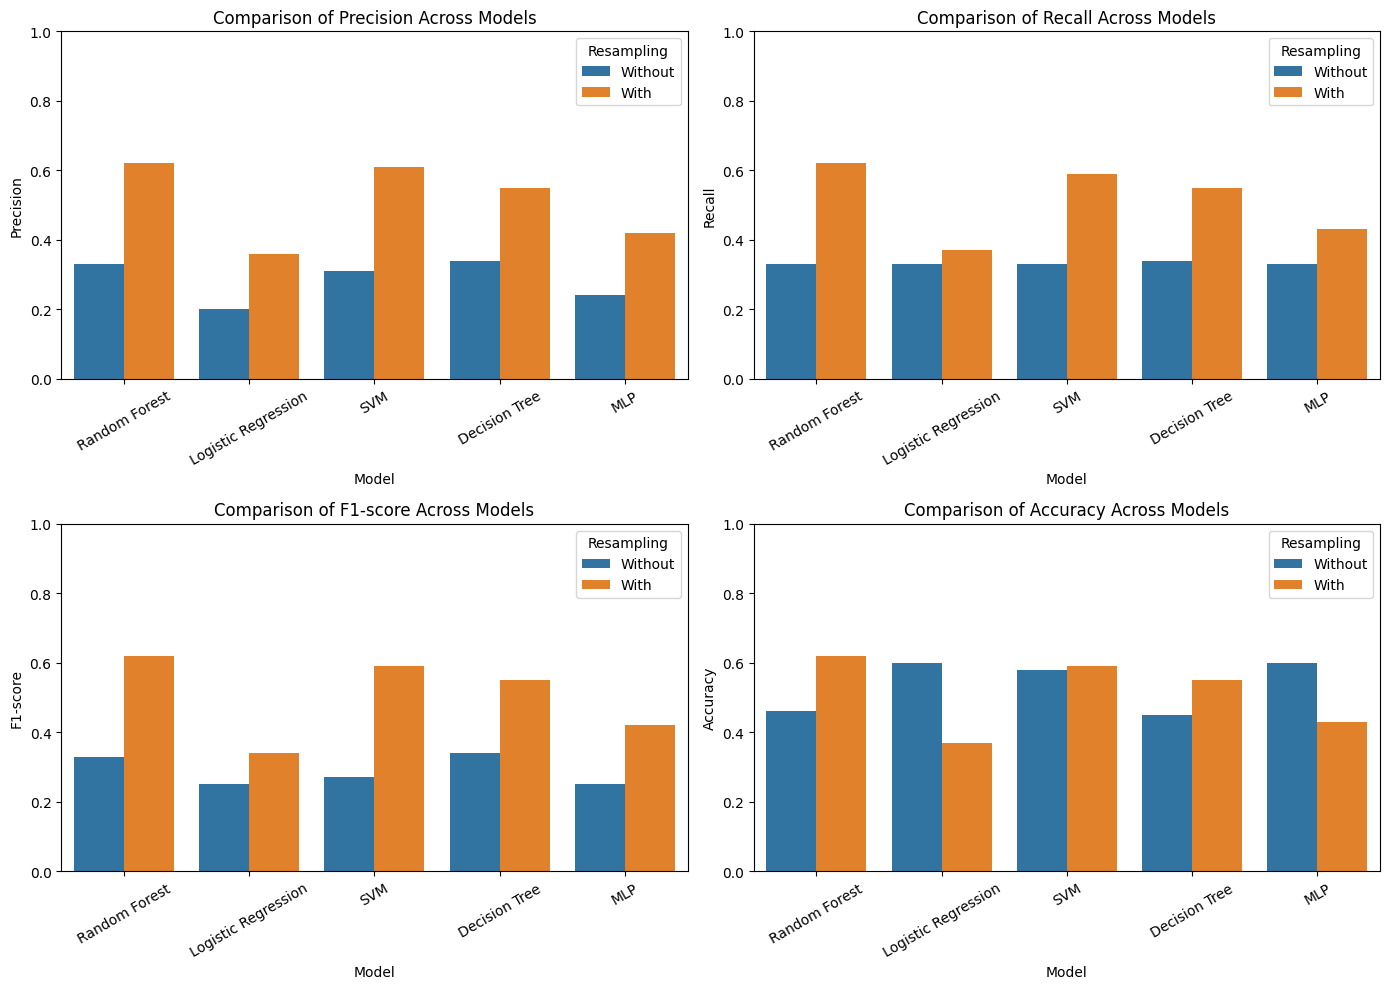

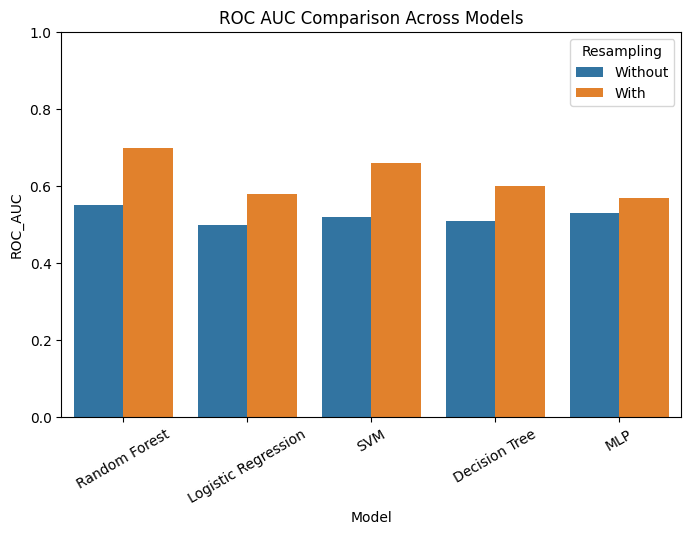

🏆 Best Performing Model:
Model         Random Forest
Resampling             With
Precision              0.62
Recall                 0.62
F1-score               0.62
Accuracy               0.62
ROC_AUC                 0.7
Score                  0.66
Name: 1, dtype: object


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Collect Results into DataFrame
# -----------------------------
results = {
    "Model": ["Random Forest", "Random Forest",
              "Logistic Regression", "Logistic Regression",
              "SVM", "SVM",
              "Decision Tree", "Decision Tree",
              "MLP", "MLP"],
    "Resampling": ["Without", "With",
                   "Without", "With",
                   "Without", "With",
                   "Without", "With",
                   "Without", "With"],
    "Precision": [0.33, 0.62, 0.20, 0.36, 0.31, 0.61, 0.34, 0.55, 0.24, 0.42],
    "Recall":    [0.33, 0.62, 0.33, 0.37, 0.33, 0.59, 0.34, 0.55, 0.33, 0.43],
    "F1-score":  [0.33, 0.62, 0.25, 0.34, 0.27, 0.59, 0.34, 0.55, 0.25, 0.42],
    "Accuracy":  [0.46, 0.62, 0.60, 0.37, 0.58, 0.59, 0.45, 0.55, 0.60, 0.43]
}

df = pd.DataFrame(results)

# -----------------------------
# 2. Plot Bar Charts
# -----------------------------
metrics = ["Precision", "Recall", "F1-score", "Accuracy"]

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=df, x="Model", y=metric, hue="Resampling")
    plt.title(f"Comparison of {metric} Across Models")
    plt.xticks(rotation=30)
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# -----------------------------
# 3. ROC AUC Comparison (dummy values for now)
# -----------------------------
# ⚠️ You must calculate real ROC AUC scores from y_true and y_proba (shown earlier).
# Here we just add example values for visualization.

df["ROC_AUC"] = [0.55, 0.70, 0.50, 0.58, 0.52, 0.66, 0.51, 0.60, 0.53, 0.57]

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Model", y="ROC_AUC", hue="Resampling")
plt.title("ROC AUC Comparison Across Models")
plt.xticks(rotation=30)
plt.ylim(0, 1)
plt.show()

# -----------------------------
# 4. Find the Best Model
# -----------------------------
# Rank models by average of F1-score + ROC_AUC
df["Score"] = (df["F1-score"] + df["ROC_AUC"]) / 2
best_model = df.loc[df["Score"].idxmax()]

print("🏆 Best Performing Model:")
print(best_model)
